In [1]:
## Image Processing ##

In [2]:
from skimage.io import *
from skimage.filters import *
from skimage.exposure import * 
from skimage.transform import * 
from skimage.color import rgb2gray
from sklearn.metrics import mean_squared_error as mse 
import matplotlib.pyplot as plt
from skimage.io import imread

In [3]:
img = imread("1.jpeg")
liver2 = imread("2.jpeg")
liver4 = imread("3.jpeg")

Text(0.5, 1.0, 'liver 3')

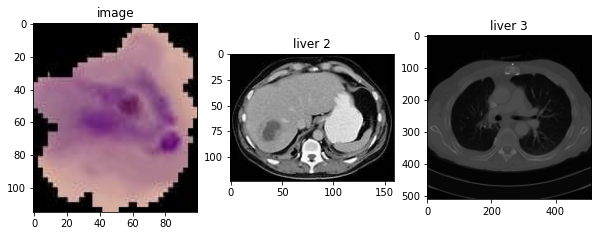

In [4]:
plt.figure(figsize = (10,10))
plt.subplot(131).imshow(img)
plt.title("image")
plt.subplot(132).imshow(liver2)
plt.title("liver 2")
plt.subplot(133).imshow(liver4,cmap = "gray")
plt.title("liver 3")

In [5]:
##Gaussian Blur##

In [6]:
##Mild Smoothing

Mean Squared Error :  15201.916495057578


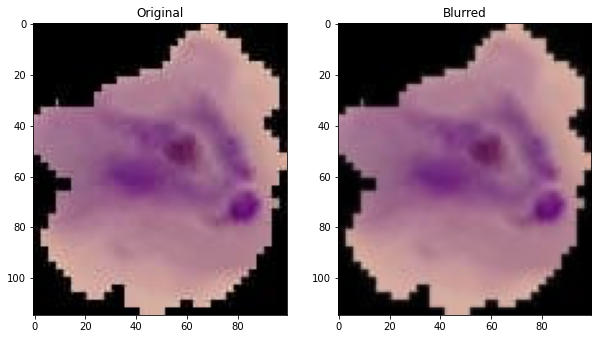

In [7]:
plt.figure(figsize = (10,10)) 
plt.subplot(121).imshow(img)
plt.title("Original")
blurred = gaussian(img,0.5,multichannel=True)
plt.subplot(122).imshow(blurred) 
plt.title("Blurred")
print("Mean Squared Error : ",mse(img.flatten(),blurred.flatten()))

In [8]:
## More smoothing

Mean Squared Error :  15203.652868619043


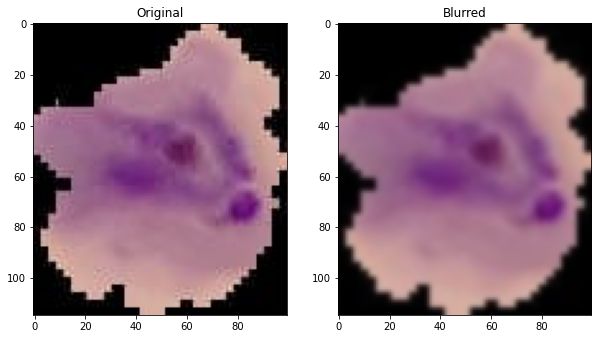

In [9]:
plt.figure(figsize = (10,10)) 
plt.subplot(121).imshow(img) 
plt.title("Original")
blurred = gaussian(img,1,multichannel=True) 
plt.subplot(122).imshow(blurred) 
plt.title("Blurred")
print("Mean Squared Error : ",mse(img.flatten(),blurred.flatten()))

In [10]:
##Part of the image Smoothing

In [11]:
type(img)

numpy.ndarray

In [12]:
def blur(image, x0, x1, y0, y1, sigma=1, imshowall=False): 
    x0, x1 = min(x0, x1), max(x0, x1)
    y0, y1 = min(y0, y1), max(y0, y1)
    im = image.copy()
    sub_im = im[x0:x1,y0:y1].copy()
    if imshowall: imshow(sub_im)
    blur_sub_im = gaussian(sub_im, sigma=sigma) 
    if imshowall: imshow(blur_sub_im) 
    blur_sub_im = np.round(255 * blur_sub_im)
    im[x0:x1,y0:y1] = blur_sub_im
    return im

Mean Squared Error :  1.742608695652174


<ipython-input-12-515e9e0fef0b>:7: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  blur_sub_im = gaussian(sub_im, sigma=sigma)


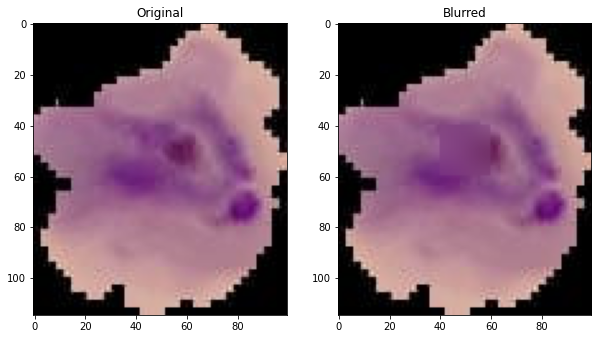

In [13]:
import numpy as np
plt.figure(figsize = (10,10))
plt.subplot(121).imshow(img)
plt.title("Original")
blurred = blur(img,40,60,40,60,5)
plt.subplot(122).imshow(blurred)
plt.title("Blurred")
print("Mean Squared Error : ",mse(img.flatten(),blurred.flatten()))

In [14]:
## Hist Plot of Liver 2 ##

(array([20874.,  3414.,  2544.,  3480.,  5553.,  7725.,  9870.,  1014.,
         3408.,  1638.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

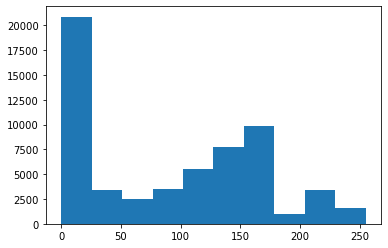

In [15]:
plt.hist(liver2.flatten())

In [16]:
## Hist Plot of Liver 4 ##

(array([1.5300e+05, 1.2810e+04, 8.8719e+04, 7.2490e+03, 3.0700e+02,
        2.3000e+01, 2.2000e+01, 8.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

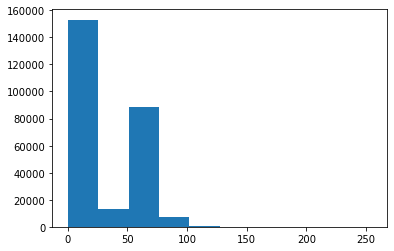

In [17]:
plt.hist(liver4.flatten())

In [18]:
## Histogram Matching ##

<ipython-input-19-766040d32a5c>:4: UserWarning: DEPRECATED: skimage.transform.match_histograms has been moved to skimage.exposure.match_histograms. It will be removed from skimage.transform in version 0.18.
  matched = match_histograms(image, reference)


Text(0.5, 1.0, 'Matched')

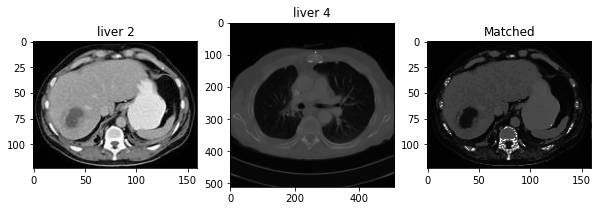

In [19]:
reference = liver4
image = rgb2gray(liver2)

matched = match_histograms(image, reference)

plt.figure(figsize = (10,10))
plt.subplot(131).imshow(image ,cmap = "gray")
plt.title("liver 2")
plt.subplot(132).imshow(reference ,cmap = "gray")
plt.title("liver 4")
plt.subplot(133).imshow(matched,cmap = "gray")
plt.title("Matched")

Text(0.5, 1.0, 'Matched')

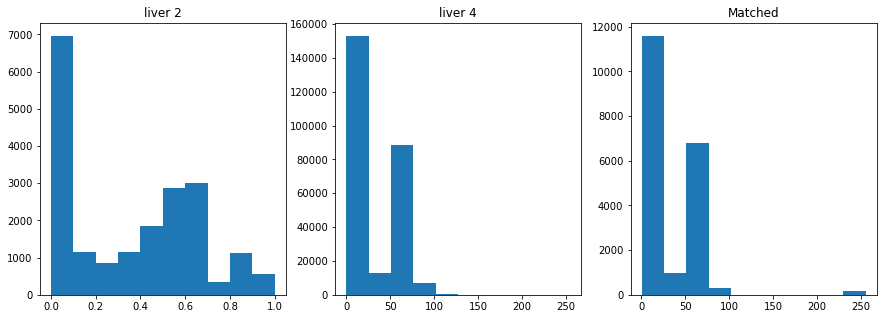

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(131).hist(image.flatten())
plt.title("liver 2")
plt.subplot(132).hist(reference.flatten())
plt.title("liver 4")
plt.subplot(133).hist(matched.flatten())
plt.title("Matched")